In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

# Read The LME Spot Price Data

In [2]:
metal = '../big/NExT/Data/Version 1/LME/LMAHDY.csv'
price = pd.read_csv(metal)
price['Index'] =  pd.to_datetime(price['Index'])
price['return_1d'] = (price['LMAHDY']/price['LMAHDY'].shift(1)-1)*100
price.dropna(inplace = True)

# Create return over several time horizon

In [3]:
price['return_1d'] = ((price['LMAHDY'] / price['LMAHDY'].shift(1)) -1)*100
price['return_3d'] = ((price['LMAHDY'] / price['LMAHDY'].shift(3)) -1)*100
price['return_5d'] = ((price['LMAHDY'] / price['LMAHDY'].shift(5)) -1)*100
price['return_7d'] = ((price['LMAHDY'] / price['LMAHDY'].shift(7)) -1)*100
price['return_10d'] = ((price['LMAHDY'] / price['LMAHDY'].shift(10)) -1)*100
price['return_15d'] = ((price['LMAHDY'] / price['LMAHDY'].shift(15)) -1)*100
price['return_20d'] = ((price['LMAHDY'] / price['LMAHDY'].shift(20)) -1)*100

In [4]:
period = 100
price['Std1d_20'] = (price[u'return_1d'].shift(1).rolling(period).std())
price['Std3d_20'] = (price[u'return_3d'].shift(1).rolling(period).std())
price['Std5d_20'] = (price[u'return_5d'].shift(1).rolling(period).std())
price['Std7d_20'] = (price[u'return_7d'].shift(1).rolling(period).std())
price['Std10d_20'] = (price[u'return_10d'].shift(1).rolling(period).std())
price['Std15d_20'] = (price[u'return_15d'].shift(1).rolling(period).std())
price['Std20d_20'] = (price[u'return_20d'].shift(1).rolling(period).std())

In [5]:
price_forward = price.copy()
price_forward['return_1d'] = price_forward['return_1d'].shift(-1)
price_forward['return_3d'] = price_forward['return_3d'].shift(-3)
price_forward['return_5d'] = price_forward['return_5d'].shift(-5)
price_forward['return_7d'] = price_forward['return_7d'].shift(-7)
price_forward['return_10d'] = price_forward['return_10d'].shift(-10)
price_forward['return_15d'] = price_forward['return_15d'].shift(-15)
price_forward['return_20d'] = price_forward['return_20d'].shift(-20)

# Read the Baidu Sentiment Score through analyzing each news title from Chinese new sources

In [6]:
sentiment = pd.read_csv('./metal_score/Al_sentiment.csv')
sentiment['Sentiment_article'] = sentiment['Sentiment_article']*100
sentiment['date'] = sentiment['date'].apply(lambda x: pd.to_datetime(x).floor('D'))

# Sort by date and drop NA

In [7]:
sentiment.dropna(inplace=True)
sentiment.sort_values('date',axis=0,inplace = True)

# Data Preprocessing

In [8]:
# Input: target is a float value we wish to categorize, num_tier is int which indicates 
# the number of classes we wish to classified, tier_lst is a list of cdf probability (sorted ascendingly) for us to have a range to classify
# different classes, mean is the distirbution mean, std is the distribtion std

# Result: This function will return a classified value 

def discrete(target,num_tier,tier_lst,mean,std):
    if num_tier-1 != len(tier_lst):
        print ('num_tier does not match tier_lst')
        return
    
    tier_point =[]
    for i in tier_lst:
        tier_point.append(norm.ppf(i, loc=mean, scale=std))
    
    decided = 0
    
    for i in range(num_tier-1):
        if target<=tier_point[i]:
            decided = 1
            break
    if decided ==0:
        return num_tier-1
    else:
        return i

In [9]:
def give_sign (data):
    if data>0:
        return 1
    elif data<0:
        return -1
    else:
        return 0

In [10]:
price_sentiment = price_forward.merge(sentiment, left_on='Index', right_on='date',how='inner')
price_sentiment.drop(['Index','title','Al_fact','Al_action','news type','Sentiment'],axis=1,inplace = True)
price_sentiment = price_sentiment.dropna()

Text(0.5,1,'Distribution')

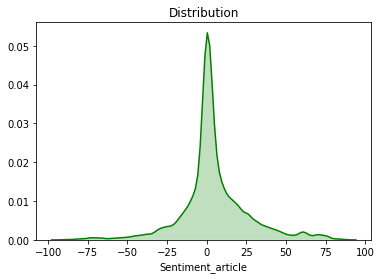

In [11]:
score = price_sentiment['Sentiment_article'].dropna()
sns.distplot(score, hist=False, color="g", kde_kws={"shade": True}).set_title('Distribution')

# Discrete Score

In [12]:
target = price_sentiment['Sentiment_article']
mean = target.mean()
std = target.std()
tier = 5
tier_lst = [0.159,0.309,0.691,0.841]
price_sentiment['Discrete_score'] = target.apply(lambda x: discrete(x,tier,tier_lst,mean,std))-2
price_sentiment['Discrete_score'] = price_sentiment['Discrete_score'].apply(give_sign)

# Discrete Price

In [13]:
target = 'return_1d'
output_name = 'discrete_1d'
mean = 0
std = 'Std1d_20'
tier = 5
tier_lst = [0.159,0.359,0.661,0.841]
price_sentiment[output_name] = price_sentiment.apply(lambda x: discrete(x[target],tier,tier_lst,mean,x[std]),axis=1)-2
price_sentiment[output_name] = price_sentiment[output_name].apply(give_sign)

In [14]:
target = 'return_3d'
output_name = 'discrete_3d'
mean = 0
std = 'Std3d_20'
tier = 5
tier_lst = [0.159,0.353,0.661,0.841]
price_sentiment[output_name] = price_sentiment.apply(lambda x: discrete(x[target],tier,tier_lst,mean,x[std]),axis=1)-2
price_sentiment[output_name] = price_sentiment[output_name].apply(give_sign)

In [15]:
target = 'return_5d'
output_name = 'discrete_5d'
mean = 0
std = 'Std5d_20'
tier = 5
tier_lst = [0.159,0.329,0.661,0.841]
price_sentiment[output_name] = price_sentiment.apply(lambda x: discrete(x[target],tier,tier_lst,mean,x[std]),axis=1)-2
price_sentiment[output_name] = price_sentiment[output_name].apply(give_sign)

In [16]:
target = 'return_7d'
output_name = 'discrete_7d'
mean = 0
std = 'Std7d_20'
tier = 5
tier_lst = [0.159,0.327,0.663,0.841]
price_sentiment[output_name] = price_sentiment.apply(lambda x: discrete(x[target],tier,tier_lst,mean,x[std]),axis=1)-2
price_sentiment[output_name] = price_sentiment[output_name].apply(give_sign)

In [17]:
target = 'return_10d'
output_name = 'discrete_10d'
mean = 0
std = 'Std10d_20'
tier = 5
tier_lst = [0.159,0.329,0.661,0.841]
price_sentiment[output_name] = price_sentiment.apply(lambda x: discrete(x[target],tier,tier_lst,mean,x[std]),axis=1)-2
price_sentiment[output_name] = price_sentiment[output_name].apply(give_sign)

In [18]:
target = 'return_15d'
output_name = 'discrete_15d'
mean = 0
std = 'Std15d_20'
tier = 5
tier_lst = [0.159,0.289,0.681,0.841]
price_sentiment[output_name] = price_sentiment.apply(lambda x: discrete(x[target],tier,tier_lst,mean,x[std]),axis=1)-2
price_sentiment[output_name] = price_sentiment[output_name].apply(give_sign)

In [19]:
target = 'return_20d'
output_name = 'discrete_20d'
mean = 0
std = 'Std20d_20'
tier = 5
tier_lst = [0.159,0.279,0.671,0.841]
price_sentiment[output_name] = price_sentiment.apply(lambda x: discrete(x[target],tier,tier_lst,mean,x[std]),axis=1)-2
price_sentiment[output_name] = price_sentiment[output_name].apply(give_sign)

# GET Weight

In [20]:
price_sentiment['id'] = range(0,len(price_sentiment))

In [21]:
print(price_sentiment.columns)
print(price_sentiment.columns[15:])
print(list(price_sentiment.columns[19:-1]))

Index(['LMAHDY', 'return_1d', 'return_3d', 'return_5d', 'return_7d',
       'return_10d', 'return_15d', 'return_20d', 'Std1d_20', 'Std3d_20',
       'Std5d_20', 'Std7d_20', 'Std10d_20', 'Std15d_20', 'Std20d_20', 'url',
       'company', 'date', 'Sentiment_article', 'Discrete_score', 'discrete_1d',
       'discrete_3d', 'discrete_5d', 'discrete_7d', 'discrete_10d',
       'discrete_15d', 'discrete_20d', 'id'],
      dtype='object')
Index(['url', 'company', 'date', 'Sentiment_article', 'Discrete_score',
       'discrete_1d', 'discrete_3d', 'discrete_5d', 'discrete_7d',
       'discrete_10d', 'discrete_15d', 'discrete_20d', 'id'],
      dtype='object')
['Discrete_score', 'discrete_1d', 'discrete_3d', 'discrete_5d', 'discrete_7d', 'discrete_10d', 'discrete_15d', 'discrete_20d']


In [22]:
selected_cols = price_sentiment.columns[15:]
returns_lst = list(price_sentiment.columns[19:-1])

In [23]:
# Calculate the probability of getting right prediction in the rolling window

def prob(array):
    dic = {True:0,False:0}
    for i in array:
        dic[i]+=1
    return dic[True]/(np.sum(list(dic.values())))

In [24]:
def cal_prob(data,cal_window,selected_cols, returns_lst):
    final_df = data[['id']]
    
    for returns in returns_lst:
        start = True
        for com in data['company'].unique():
            name_same = 'Realibility'+returns[8:]+'_same'
            rev_same = 'Realibility'+returns[8:]+'_rev'
            df_com = data[data['company']== com ][selected_cols]
            
            for direction in [-1,0,1]:
                current_df = df_com[df_com['Discrete_score']==direction]
                same = current_df['Discrete_score']== current_df[returns]
                reverse = (-current_df['Discrete_score'])== current_df[returns]
                current_df[name_same] = same.shift(1).rolling(cal_window).apply(prob)
                current_df[rev_same] = reverse.shift(1).rolling(cal_window).apply(prob)
        
                if start:
                    final_df = final_df.merge(current_df[[name_same,rev_same,'id']], on='id',how='left')
                    
                    start = False
                else:
                    final_df[name_same]= final_df[name_same].combine_first(current_df[name_same])
                    final_df[rev_same]= final_df[rev_same].combine_first(current_df[rev_same])
    return final_df

In [25]:
final = cal_prob(price_sentiment,20,selected_cols,returns_lst)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  from ipykernel import kernelapp as app
D:\anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\anaconda\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behav

In [26]:
sent_weight = pd.merge(price_sentiment[['date','Sentiment_article','id']],final,on ='id', how ='inner')
sent_weight = sent_weight.fillna(0)

In [27]:
sent_weight[sent_weight['date'] == pd.to_datetime('2016-11-30')]

,date,Sentiment_article,id,Realibility_score_same,Realibility_score_rev,Realibility_1d_same,Realibility_1d_rev,Realibility_3d_same,Realibility_3d_rev,Realibility_5d_same,Realibility_5d_rev,Realibility_7d_same,Realibility_7d_rev,Realibility_10d_same,Realibility_10d_rev,Realibility_15d_same,Realibility_15d_rev,Realibility_20d_same,Realibility_20d_rev
6481,2016-11-30,18.689535,6481,1.0,0.0,0.50,0.15,0.55,0.35,0.55,0.25,0.35,0.25,0.40,0.30,0.35,0.20,0.30,0.25
6482,2016-11-30,-4.591148,6482,1.0,1.0,0.15,0.15,0.15,0.15,0.25,0.25,0.20,0.20,0.70,0.70,0.75,0.75,0.75,0.75
6483,2016-11-30,6.891540,6483,1.0,1.0,0.10,0.10,0.20,0.20,0.15,0.15,0.20,0.20,0.45,0.45,0.40,0.40,0.40,0.40
6484,2016-11-30,3.073285,6484,1.0,1.0,0.15,0.15,0.20,0.20,0.25,0.25,0.20,0.20,0.70,0.70,0.80,0.80,0.75,0.75
6485,2016-11-30,3.073285,6485,1.0,1.0,0.15,0.15,0.25,0.25,0.25,0.25,0.20,0.20,0.70,0.70,0.85,0.85,0.75,0.75
6486,2016-11-30,-12.555260,6486,1.0,0.0,0.30,0.40,0.30,0.50,0.10,0.60,0.10,0.60,0.15,0.45,0.25,0.35,0.35,0.40
6487,2016-11-30,-2.107539,6487,1.0,1.0,0.15,0.15,0.30,0.30,0.40,0.40,0.20,0.20,0.45,0.45,0.95,0.95,0.75,0.75
6488,2016-11-30,24.260006,6488,1.0,0.0,0.50,0.20,0.35,0.20,0.45,0.40,0.35,0.45,0.40,0.25,0.75,0.10,0.60,0.10
6489,2016-11-30,24.778105,6489,1.0,0.0,0.50,0.20,0.35,0.15,0.45,0.40,0.40,0.40,0.40,0.20,0.75,0.05,0.60,0.05
6490,2016-11-30,-15.592428,6490,1.0,0.0,0.40,0.40,0.35,0.45,0.20,0.40,0.20,0.35,0.10,0.50,0.15,0.40,0.20,0.35


In [28]:
# Input: df is the sent_weight dataframe, indi1 is the col name of the Sentiment_article, threshold should be an integer and if the 
# freq of recommendation in a day less than that number then we will not consider the indicator as valid
# Real is the name of the Realibility col

# Obj: This fucntion will aggregate the indicator score happened in a day into final score considering the Realibility

# Reason for threshold: Threshold will ensure that we wouldn't solely listen to few voices to make decision

def create_indicator(df,indi,threshold,real_same,real_reverse):
    result =[]
    current_day = 0 
    num = 0
    
    real_lst  = []
    score_lst = []
    
    for day,score,real_same,real_reverse in zip(df['date'],df[indi],df[real_same],df[real_reverse]):
        if current_day == day:
            if real_same>real_reverse:
                real_lst.append(np.exp(real_same))
                score_lst.append(score)
            elif real_reverse>real_same:
                real_lst.append(np.exp(real_reverse))
                score_lst.append(-score)
            else:
                real_lst.append(np.exp(real_same))
                score_lst.append(0)
                
            num +=1
        else:
            if num>threshold:
                
                total = np.sum(real_lst)
                current_score = 0
                for real,score in zip(real_lst,score_lst):
                    current_score += score*real
                
                result.append([current_day,current_score/total])
            else:
                result.append([current_day,np.nan])
            
            current_day = day
            num = 1
            real_lst =[] 
            score_lst=[]
            if real_same>real_reverse:
                real_lst.append(np.exp(real_same))
                score_lst.append(score)
            elif real_reverse>real_same:
                real_lst.append(np.exp(real_reverse))
                score_lst.append(-score)
            else:
                real_lst.append(np.exp(real_same))
                score_lst.append(score)
            
    if num>threshold:
        
        total = np.sum(real_lst)
        current_score = 0
        
        for real,score in zip(real_lst,score_lst):
            current_score += score*real
        result.append([current_day,current_score/total])
    else:
        result.append([current_day,np.nan])
    final = pd.DataFrame(result[1:],columns=['Date','Score'])
    final['Date'] =  pd.to_datetime(final['Date'])
    return final

In [29]:
indicator1 = create_indicator(sent_weight,'Sentiment_article',8,'Realibility_1d_same','Realibility_1d_rev').dropna()

In [30]:
indicator1.head(10)

,Date,Score
1250,2014-05-06,-5.012394
1262,2014-05-22,-4.505850
1269,2014-06-04,5.342472
1273,2014-06-10,7.088216
1275,2014-06-12,5.045976
1284,2014-06-25,2.302566
1288,2014-07-01,0.943649
1300,2014-07-17,6.425407
1303,2014-07-22,-1.806060
1304,2014-07-23,13.368984


Text(0.5,1,'Distribution')

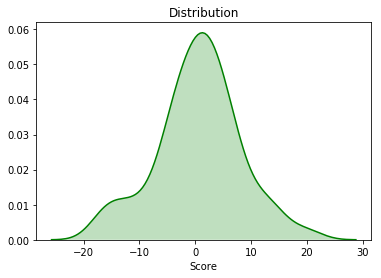

In [31]:
score = indicator1['Score']
sns.distplot(score, hist=False, color="g", kde_kws={"shade": True}).set_title('Distribution')

# Simple price prediction using indicator

Define a function to give positive sign to data point bigger than zero and negative sign to data point smaller than zero

In [32]:
# Input: data is the total dataframe, result is the col name of the target return and indicator is the col name of the predictive score
# Obj: This fucntion will give us a the result of the simple prediction strategy

def prediction(result,data,indicator):
    indi_1 = data[indicator]
    sign_indi1 = indi_1.apply(give_sign) 
    sign_return = data[result].apply(give_sign)
    same_result_1= (sign_return == sign_indi1)
    reverse_result_1 = (sign_indi1 == -1 *sign_return)
    
    for i in sign_return.value_counts().index:
        print('Number of ' + str(i) + ' in '+ result+ " : "+str(round(sign_return.value_counts()[i]/float(len(sign_return)),6)))
    
    print('Accuracy for following the same sign of Indicator 1 ' + result+ " : "+str(round(same_result_1.value_counts()[True]/float(len(sign_return)),6)))
    print('Accuracy for following the reverse sign of Indicator 1 '+ result+ " : "+str(round(reverse_result_1.value_counts()[True]/float(len(sign_return)),6)))

# Discrete score and make prediction

In [33]:
# Input: data is the total dataframe, target is the col name of target return, indicator is the col name of indicator

# Result: This function will return a confusion metric 

def draw_confusion(data,target,indicator):
    indi_1 = data[indicator]
    sign_indi1 = indi_1.apply(give_sign) 
    sign_return = data[target].apply(give_sign)
    result = []
    for i in [-1,0,1]:
        row = []
        for j in [-1,0,1]:
            num = (sign_return==i) & (sign_indi1 ==j)
            row.append(num.value_counts()[True])
        result.append(row)
    
    plt.figure(figsize=(9,9))
    sns.heatmap(result, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel(target);
    plt.xlabel('Score');
    plt.title('Confusion metric for Score vs ' + target, size = 15);
    return result

## Classify our score data and return

Number of 1 in discrete_1d : 0.386792
Number of -1 in discrete_1d : 0.377358
Number of 0 in discrete_1d : 0.235849
Accuracy for following the same sign of Indicator 1 discrete_1d : 0.358491
Accuracy for following the reverse sign of Indicator 1 discrete_1d : 0.367925
[-0.95186899 -0.34424144  0.39577363  0.95186899]


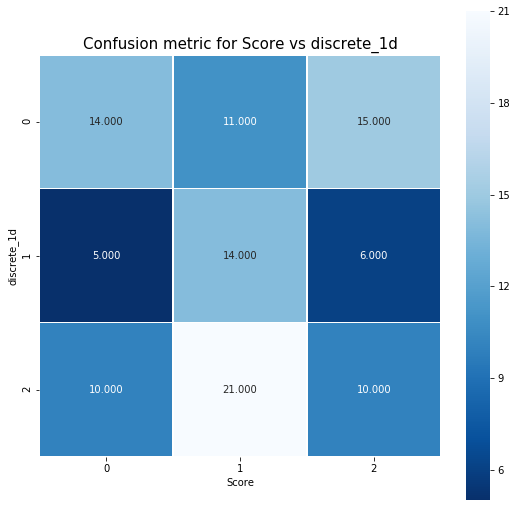

In [34]:
day = '1d'
real_same = 'Realibility_'+day+'_same'
real_reverse = 'Realibility_'+day+'_rev'
# Create Indicator
indicator1 = create_indicator(sent_weight,'Sentiment_article',8,real_same,real_reverse ).dropna()
target = indicator1['Score']
mean = target.mean()
std = target.std()
tier = 5
tier_lst = [0.159,0.309,0.691,0.841]

indicator1['score'] = target
indicator1['Discrete_score'] = target.apply(lambda x: discrete(x,tier,tier_lst,mean,std))-2
indicator1['Discrete_score'] = indicator1['Discrete_score'].apply(give_sign)
indicator1['Discrete_score'].value_counts()
price_indicator_forward = indicator1.merge(price_forward,left_on='Date',right_on='Index',how='inner')


# Price Predicition
target = 'return_'+day
output_name = 'discrete_'+day
mean = 0
std = 'Std'+day+'_20'
tier = 5
tier_lst = [0.159,0.359,0.661,0.841]
price_indicator_forward[output_name] = price_indicator_forward.apply(lambda x: discrete(x[target],tier,tier_lst,mean,x[std]),axis=1)-2
prediction(output_name,price_indicator_forward,'Discrete_score')
result = draw_confusion(price_indicator_forward,output_name,'Discrete_score')
print(norm.ppf(tier_lst, loc=mean, scale=price_indicator_forward[std].iloc[-1]))

In [35]:
price_indicator_forward.columns

Index(['Date', 'Score', 'score', 'Discrete_score', 'Index', 'LMAHDY',
       'return_1d', 'return_3d', 'return_5d', 'return_7d', 'return_10d',
       'return_15d', 'return_20d', 'Std1d_20', 'Std3d_20', 'Std5d_20',
       'Std7d_20', 'Std10d_20', 'Std15d_20', 'Std20d_20', 'discrete_1d'],
      dtype='object')

In [36]:
price_indicator_forward[['Date','Score','discrete_1d']]

,Date,Score,discrete_1d
0,2014-05-06,-5.012394,-1
1,2014-05-22,-4.505850,1
2,2014-06-04,5.342472,1
3,2014-06-10,7.088216,-2
4,2014-06-12,5.045976,0
5,2014-06-25,2.302566,0
6,2014-07-01,0.943649,2
7,2014-07-17,6.425407,-1
8,2014-07-22,-1.806060,-2
9,2014-07-23,13.368984,1


Number of 1 in discrete_3d : 0.386792
Number of -1 in discrete_3d : 0.349057
Number of 0 in discrete_3d : 0.264151
Accuracy for following the same sign of Indicator 1 discrete_3d : 0.330189
Accuracy for following the reverse sign of Indicator 1 discrete_3d : 0.330189
[-1.95236941 -0.73754944  0.81176751  1.95236941]


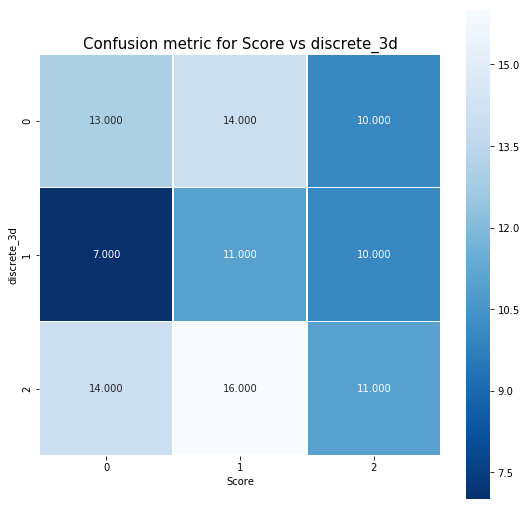

In [37]:
day = '3d'
real_same = 'Realibility_'+day+'_same'
real_reverse = 'Realibility_'+day+'_rev'
# Create Indicator
indicator1 = create_indicator(sent_weight,'Sentiment_article',8,real_same,real_reverse ).dropna()
target = indicator1['Score']
mean = target.mean()
std = target.std()
tier = 5
tier_lst = [0.159,0.309,0.691,0.841]
indicator1['Discrete_score'] = target.apply(lambda x: discrete(x,tier,tier_lst,mean,std))-2
indicator1['Discrete_score'] = indicator1['Discrete_score'].apply(give_sign)
indicator1['Discrete_score'].value_counts()
price_indicator_forward = indicator1.merge(price_forward,left_on='Date',right_on='Index',how='inner')


# Price Predicition
target = 'return_'+day
output_name = 'discrete_'+day
mean = 0
std = 'Std'+day+'_20'
tier = 5
tier_lst = [0.159,0.353,0.661,0.841]
price_indicator_forward[output_name] = price_indicator_forward.apply(lambda x: discrete(x[target],tier,tier_lst,mean,x[std]),axis=1)-2
prediction(output_name,price_indicator_forward,'Discrete_score')
result = draw_confusion(price_indicator_forward,output_name,'Discrete_score')
print(norm.ppf(tier_lst, loc=mean, scale=price_indicator_forward[std].iloc[-1]))

Number of 1 in discrete_5d : 0.443396
Number of 0 in discrete_5d : 0.311321
Number of -1 in discrete_5d : 0.245283
Accuracy for following the same sign of Indicator 1 discrete_5d : 0.358491
Accuracy for following the reverse sign of Indicator 1 discrete_5d : 0.311321
[-2.5880272  -1.14729134  1.07606501  2.5880272 ]


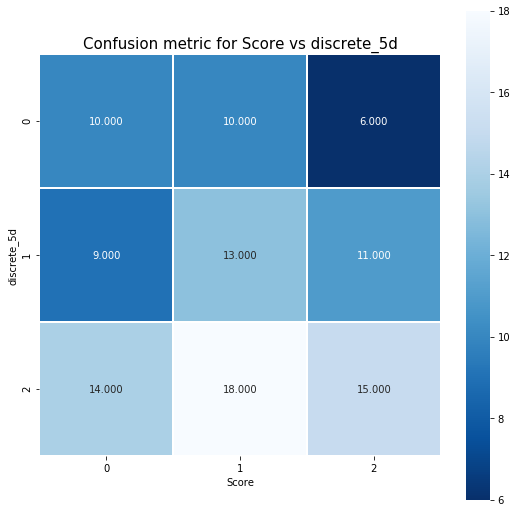

In [38]:
day = '5d'
real_same = 'Realibility_'+day+'_same'
real_reverse = 'Realibility_'+day+'_rev'
# Create Indicator
indicator1 = create_indicator(sent_weight,'Sentiment_article',8,real_same,real_reverse ).dropna()
target = indicator1['Score']
mean = target.mean()
std = target.std()
tier = 5
tier_lst = [0.159,0.309,0.691,0.841]
indicator1['Discrete_score'] = target.apply(lambda x: discrete(x,tier,tier_lst,mean,std))-2
indicator1['Discrete_score'] = indicator1['Discrete_score'].apply(give_sign)
indicator1['Discrete_score'].value_counts()
price_indicator_forward = indicator1.merge(price_forward,left_on='Date',right_on='Index',how='inner')


# Price Predicition
target = 'return_'+day
output_name = 'discrete_'+day
mean = 0
std = 'Std'+day+'_20'
tier = 5
tier_lst = [0.159,0.329,0.661,0.841]
price_indicator_forward[output_name] = price_indicator_forward.apply(lambda x: discrete(x[target],tier,tier_lst,mean,x[std]),axis=1)-2
prediction(output_name,price_indicator_forward,'Discrete_score')
result = draw_confusion(price_indicator_forward,output_name,'Discrete_score')
print(norm.ppf(tier_lst, loc=mean, scale=price_indicator_forward[std].iloc[-1]))

Number of 1 in discrete_7d : 0.45283
Number of 0 in discrete_7d : 0.320755
Number of -1 in discrete_7d : 0.226415
Accuracy for following the same sign of Indicator 1 discrete_7d : 0.386792
Accuracy for following the reverse sign of Indicator 1 discrete_7d : 0.339623
[-2.97321451 -1.33453127  1.25250938  2.97321451]


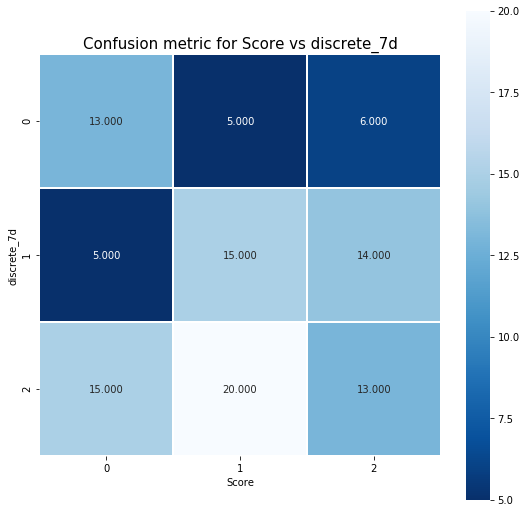

In [39]:
day = '7d'
real_same = 'Realibility_'+day+'_same'
real_reverse = 'Realibility_'+day+'_rev'

# Create Indicator
indicator1 = create_indicator(sent_weight,'Sentiment_article',8,real_same,real_reverse ).dropna()
target = indicator1['Score']
mean = target.mean()
std = target.std()
tier = 5
tier_lst = [0.159,0.309,0.691,0.841]
indicator1['Discrete_score'] = target.apply(lambda x: discrete(x,tier,tier_lst,mean,std))-2
indicator1['Discrete_score'] = indicator1['Discrete_score'].apply(give_sign)
indicator1['Discrete_score'].value_counts()
price_indicator_forward = indicator1.merge(price_forward,left_on='Date',right_on='Index',how='inner')


# Price Predicition
target = 'return_'+day
output_name = 'discrete_'+day
mean = 0
std = 'Std'+day+'_20'
tier = 5
tier_lst = [0.159,0.327,0.663,0.841]
price_indicator_forward[output_name] = price_indicator_forward.apply(lambda x: discrete(x[target],tier,tier_lst,mean,x[std]),axis=1)-2
prediction(output_name,price_indicator_forward,'Discrete_score')
result = draw_confusion(price_indicator_forward,output_name,'Discrete_score')
print(norm.ppf(tier_lst, loc=mean, scale=price_indicator_forward[std].iloc[-1]))

Number of 0 in discrete_10d : 0.45283
Number of 1 in discrete_10d : 0.415094
Number of -1 in discrete_10d : 0.132075
Accuracy for following the same sign of Indicator 1 discrete_10d : 0.358491
Accuracy for following the reverse sign of Indicator 1 discrete_10d : 0.301887
[-3.41301846 -1.51301598  1.41908467  3.41301846]


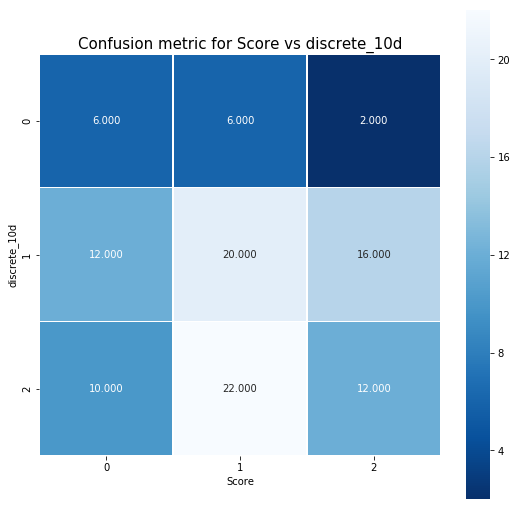

In [40]:
day = '10d'
real_same = 'Realibility_'+day+'_same'
real_reverse = 'Realibility_'+day+'_rev'
# Create Indicator
indicator1 = create_indicator(sent_weight,'Sentiment_article',8,real_same,real_reverse ).dropna()
target = indicator1['Score']
mean = target.mean()
std = target.std()
tier = 5
tier_lst = [0.159,0.309,0.691,0.841]
indicator1['Discrete_score'] = target.apply(lambda x: discrete(x,tier,tier_lst,mean,std))-2
indicator1['Discrete_score'] = indicator1['Discrete_score'].apply(give_sign)
indicator1['Discrete_score'].value_counts()
price_indicator_forward = indicator1.merge(price_forward,left_on='Date',right_on='Index',how='inner')


# Price Predicition
target = 'return_'+day
output_name = 'discrete_'+day
mean = 0
std = 'Std'+day+'_20'
tier = 5
tier_lst = [0.159,0.329,0.661,0.841]
price_indicator_forward[output_name] = price_indicator_forward.apply(lambda x: discrete(x[target],tier,tier_lst,mean,x[std]),axis=1)-2
prediction(output_name,price_indicator_forward,'Discrete_score')
result = draw_confusion(price_indicator_forward,output_name,'Discrete_score')
print(norm.ppf(tier_lst, loc=mean, scale=price_indicator_forward[std].iloc[-1]))

Number of 0 in discrete_15d : 0.443396
Number of 1 in discrete_15d : 0.40566
Number of -1 in discrete_15d : 0.150943
Accuracy for following the same sign of Indicator 1 discrete_15d : 0.358491
Accuracy for following the reverse sign of Indicator 1 discrete_15d : 0.330189
[-4.03202872 -2.24624977  1.89976203  4.03202872]


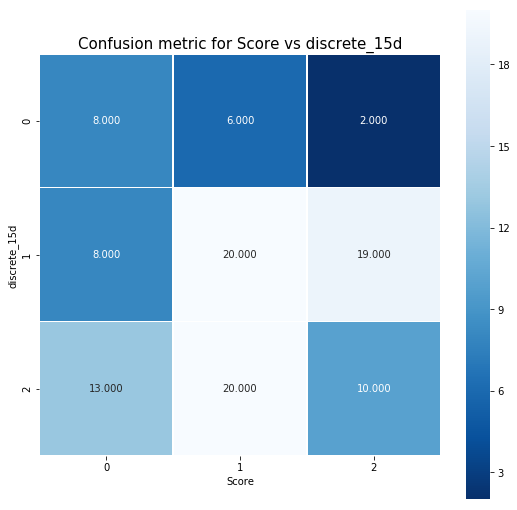

In [41]:
day = '15d'
real_same = 'Realibility_'+day+'_same'
real_reverse = 'Realibility_'+day+'_rev'
# Create Indicator
indicator1 = create_indicator(sent_weight,'Sentiment_article',8,real_same,real_reverse ).dropna()
target = indicator1['Score']
mean = target.mean()
std = target.std()
tier = 5
tier_lst = [0.159,0.309,0.691,0.841]
indicator1['Discrete_score'] = target.apply(lambda x: discrete(x,tier,tier_lst,mean,std))-2
indicator1['Discrete_score'] = indicator1['Discrete_score'].apply(give_sign)
indicator1['Discrete_score'].value_counts()
price_indicator_forward = indicator1.merge(price_forward,left_on='Date',right_on='Index',how='inner')


# Price Predicition
target = 'return_'+day
output_name = 
mean = 0'discrete_'+day
std = 'Std'+day+'_20'
tier = 5
tier_lst = [0.159,0.289,0.681,0.841]
price_indicator_forward[output_name] = price_indicator_forward.apply(lambda x: discrete(x[target],tier,tier_lst,mean,x[std]),axis=1)-2
prediction(output_name,price_indicator_forward,'Discrete_score')
result = draw_confusion(price_indicator_forward,output_name,'Discrete_score')
print(norm.ppf(tier_lst, loc=mean, scale=price_indicator_forward[std].iloc[-1]))

Number of 0 in discrete_20d : 0.45283
Number of 1 in discrete_20d : 0.415094
Number of -1 in discrete_20d : 0.132075
Accuracy for following the same sign of Indicator 1 discrete_20d : 0.386792
Accuracy for following the reverse sign of Indicator 1 discrete_20d : 0.339623
[-3.94253762 -2.19639413  1.85759671  3.94253762]


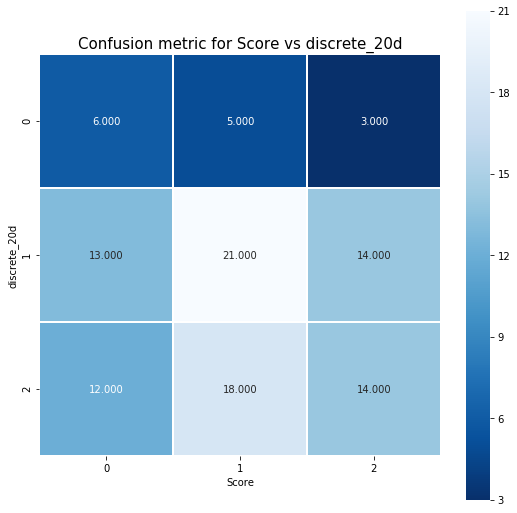

In [42]:
day = '20d'
real_same = 'Realibility_'+day+'_same'
real_reverse = 'Realibility_'+day+'_rev'
# Create Indicator
indicator1 = create_indicator(sent_weight,'Sentiment_article',8,real_same,real_reverse ).dropna()
target = indicator1['Score']
mean = target.mean()
std = target.std()
tier = 5
tier_lst = [0.159,0.309,0.691,0.841]
indicator1['Discrete_score'] = target.apply(lambda x: discrete(x,tier,tier_lst,mean,std))-2
indicator1['Discrete_score'] = indicator1['Discrete_score'].apply(give_sign)
indicator1['Discrete_score'].value_counts()
price_indicator_forward = indicator1.merge(price_forward,left_on='Date',right_on='Index',how='inner')


# Price Predicition
target = 'return_'+day
output_name = 'discrete_'+day
mean = 0
std = 'Std'+day+'_20'
tier = 5
tier_lst = [0.159,0.289,0.681,0.841]
price_indicator_forward[output_name] = price_indicator_forward.apply(lambda x: discrete(x[target],tier,tier_lst,mean,x[std]),axis=1)-2
prediction(output_name,price_indicator_forward,'Discrete_score')
result = draw_confusion(price_indicator_forward,output_name,'Discrete_score')
print(norm.ppf(tier_lst, loc=mean, scale=price_indicator_forward[std].iloc[-1]))

In [43]:
price_indicator_forward

,Date,Score,Discrete_score,Index,LMAHDY,return_1d,return_3d,return_5d,return_7d,return_10d,return_15d,return_20d,Std1d_20,Std3d_20,Std5d_20,Std7d_20,Std10d_20,Std15d_20,Std20d_20,discrete_20d
0,2014-05-06,0.177064,-1,2014-05-06,1738.75,-0.877067,-1.193386,-0.115025,-0.330697,-0.575126,3.594536,4.255931,1.075886,1.918343,2.377722,2.796693,3.290093,3.635302,3.699190,2
1,2014-05-22,2.737159,0,2014-05-22,1757.50,1.052632,2.489331,2.788051,3.783784,5.647226,2.631579,5.135135,1.080523,1.908914,2.349017,2.837700,3.507551,4.133864,4.176978,2
2,2014-06-04,19.097240,1,2014-06-04,1812.75,0.634395,4.040822,0.786098,-0.496483,1.130878,2.937526,4.633844,1.041261,1.912154,2.448024,2.995262,3.646632,4.239833,4.226245,2
3,2014-06-10,7.034829,0,2014-06-10,1865.50,-2.063790,-3.310105,-3.095685,-0.830876,-0.147414,-0.603055,2.519432,1.045759,1.943880,2.457872,2.993874,3.764096,4.387381,4.412985,1
4,2014-06-12,14.734206,1,2014-06-12,1803.75,0.000000,0.221760,2.564103,2.688843,3.243243,5.724186,5.266805,1.061153,1.958383,2.450649,3.006321,3.780035,4.468121,4.480539,2
5,2014-06-25,3.215581,0,2014-06-25,1866.00,-0.200965,-0.495713,1.647910,1.460343,2.532154,4.742765,6.993569,1.053653,1.976009,2.454537,2.962914,3.768434,4.442369,4.570443,2
6,2014-07-01,7.160421,0,2014-07-01,1854.25,2.292032,2.103276,3.141432,2.399892,4.651476,9.195092,5.999730,1.025390,1.885105,2.323844,2.807016,3.521196,4.343123,4.408013,2
7,2014-07-17,9.706225,0,2014-07-17,1974.25,-0.493858,2.557933,1.722173,1.291630,0.215272,2.190705,0.620489,1.025845,1.878827,2.309158,2.721232,3.404048,4.139129,4.220822,0
8,2014-07-22,14.463260,1,2014-07-22,2024.75,-1.395234,-2.210149,-2.926287,-2.284233,-1.284109,0.395111,-0.037042,1.045134,1.904345,2.362586,2.772963,3.430340,4.195708,4.287021,0
9,2014-07-23,16.974942,1,2014-07-23,1996.50,0.588530,0.162785,0.726271,-1.702980,0.838968,0.626096,3.380917,1.049150,1.915832,2.390210,2.805980,3.459493,4.250956,4.330323,1
